# REVOLUTIONIZING SKINCARE WITH AI POWERED RECOMMENDATIONS FOR MELANIN RICH SKIN

![2d248f5507752726ddc2198b39071e4e](https://github.com/user-attachments/assets/9c7a2247-b758-4aee-8bc7-50fa0bf76f2d)


**GROUP MEMBERS**
1. Esther Cheruiyot
2. Brian Githinji
3. Grace Gitau 
4. Maureen Imanene

## Project Summary

To come back to...

## Business Problem
Black women represent a significant demographic in the beauty and skincare industry, yet they face limited access to skincare products tailored to their specific needs, such as hyper- pigmentation, dryness, and sensitivity. Most available recommendation systems overlook the unique skin concerns of Black women, offering general suggestions rather than targeted solutions. This gap impacts consumer satisfaction, as Black women often struggle to find effective products for their melanin-rich skin. 

This project aims to develop a recommendation system using advanced AI techniques to cater specifically to Black women’s skincare needs. By integrating machine learning, content- based filtering, collaborative filtering, and sentiment analysis, the system will offer personalized skincare recommendations. Leveraging skin_tone (Author's skin tone (e.g. fair, tan, etc.) as a classification feature, we aim to distinguish and target products that align with melanin-rich skin concerns.

### Objectives
1. Develop a melanin-centered skincare recommendation system using deep learning, tailored for Black women’s unique skin needs.
2. Utilize content-based and collaborative filtering along with sentiment analysis to enhance recommendation accuracy. 
3. Deploy an accessible Streamlit interface for personalized, user-friendly skincare suggestions. 
4. Integrate Logistic Regression, SVD, and K-means clustering to improve recommendation precision.

### Stakeholders
1. *Users*: Black women seeking tailored skincare solutions. 
2. *Skincare Brands*: Companies interested in product insights for melanin-rich skin. 
3. *Healthcare Professionals*: Dermatologists who may use the system as a recommendation tool. 
4. *AI and Skincare Researchers*: Those exploring AI applications in skincare for under- represented groups.

## Data Understanding:
The dataset was collected via a Python scraper and contains:
- Product Information: Over 8,000 beauty products from the Sephora online store, including product and brand names, prices, ingredients, ratings, and various features. 
- User Reviews: Approximately 1 million reviews across over 2,000 products in the skincare category. These reviews include user appearances, skin types, and review ratings.

The key features include:
- Product Features: `product_id`, `product_name`, `brand_name`, `ingredients`, `rating`, `price_ksh`, `new`, `out_of_stock`, `highlights`. 
- Review Features: `author_id`, `rating`, `review_text`, `skin_type`, `skin_tone`, and
`helpfulness`.

## Metric of Success
- **Precision**: 80% (recommended items relevant to users)
- **Recall**: 75% (relevant items successfully captured)
- **F1 Score**: 0.77 (balance of precision and recall)
- **Hit Rate @5**: 85% (users find relevant product in top 5)
- **Average Sentiment Score**: 4.3/5 (from user feedback on recommendations)
- **Response Time**: <1 second (for generating recommendations)

### STEP 1: DATA LOADING

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS # To visualize text data
import re
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, precision_score, recall_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix, roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pickle

In [2]:
# Load the product info and skincare products reviews from Excel files
products = pd.read_csv('data/product_info.xls', encoding = "ISO-8859-1")
reviews = pd.read_csv('data/skincare_products_reviews.xls', encoding = "ISO-8859-1", low_memory=False)

print('Products size:', products.shape)
print('Reviews size:', reviews.shape)

Products size: (8494, 27)
Reviews size: (49977, 19)


In [3]:
# Necessary columns for target analysis
product_columns = [
    'product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 
    'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 
    'ingredients', 'price_usd', 'new', 'out_of_stock', 'highlights', 'primary_category', 
    'secondary_category', 'tertiary_category', 'sephora_exclusive'
]

review_columns = [
    'product_id', 'author_id', 'rating', 'is_recommended', 'helpfulness', 
    'review_text', 'skin_tone', 'skin_type', 'eye_color', 'hair_color', 'submission_time'
]

# Filter columns in each dataset
products_filtered = products[product_columns]
reviews_filtered = reviews[review_columns]

# Merge filtered dataframes on 'product_id'
data = pd.merge(products_filtered, reviews_filtered, on='product_id', how='inner')

# Display merged data info and preview
data.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating_x,reviews,size,variation_type,variation_value,...,author_id,rating_y,is_recommended,helpfulness,review_text,skin_tone,skin_type,eye_color,hair_color,submission_time
0,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,6921691467,5,1.0,1.000000,This product is amazing. Makes my skin feel so...,NaN,dry,hazel,blonde,2023-01-02
1,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,40727014792,5,1.0,0.833333,I pair this with the algae niacinamide moistur...,NaN,combination,blue,blonde,2022-11-06
2,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,7186952566,5,1.0,0.625000,Definitely my favorite I use it for under eye ...,NaN,NaN,NaN,NaN,2022-10-05
3,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,2117812169,5,1.0,1.000000,I bought this with the toner as I was looking ...,light,combination,green,brown,2022-09-15
4,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,12538328524,5,1.0,0.888889,Been using for months now. I went in and asked...,fair,NaN,NaN,NaN,2022-06-02


### STEP 2: DATA PRE-PROCESSING

In [4]:
# Checking for duplicates
data.duplicated().sum()

0

In [5]:
# Handling missing values
missing = []
unique = []
types = []
variables = []
count = []

for item in data.columns:
    variables.append(item)
    missing.append(data[item].isnull().sum())
    unique.append(data[item].nunique())
    types.append(data[item].dtypes)
    count.append(len(data[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})
print("Data info : ")
output.sort_values("missing",ascending=False).reset_index(drop=True)

Data info : 


,variable,dtype,count,unique,missing
0,variation_desc,object,49977,5,49585
1,helpfulness,float64,49977,1209,13455
2,highlights,object,49977,750,11513
3,variation_value,object,49977,283,10338
4,variation_type,object,49977,5,9052
5,hair_color,object,49977,7,8851
6,size,object,49977,280,8615
7,skin_tone,object,49977,14,7201
8,tertiary_category,object,49977,29,6996
9,eye_color,object,49977,6,6260


In [6]:
# Define threshold for missing values (e.g., 50%)
threshold = 0.5

# Calculate the percentage of missing values for each column
output['missing_percentage'] = output['missing'] / output['count']

# List columns with missing values above the threshold
columns_to_drop = output[output['missing_percentage'] > threshold]['variable'].tolist()

# Drop these columns from the data
data.drop(columns=columns_to_drop, axis=1, inplace=True)
print("Dropped columns with over 50% missing values:", columns_to_drop)

Dropped columns with over 50% missing values: ['variation_desc']


In [7]:
# Drop rows with missing values
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16060 entries, 3 to 49969
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          16060 non-null  object 
 1   product_name        16060 non-null  object 
 2   brand_id            16060 non-null  int64  
 3   brand_name          16060 non-null  object 
 4   loves_count         16060 non-null  int64  
 5   rating_x            16060 non-null  float64
 6   reviews             16060 non-null  float64
 7   size                16060 non-null  object 
 8   variation_type      16060 non-null  object 
 9   variation_value     16060 non-null  object 
 10  ingredients         16060 non-null  object 
 11  price_usd           16060 non-null  float64
 12  new                 16060 non-null  int64  
 13  out_of_stock        16060 non-null  int64  
 14  highlights          16060 non-null  object 
 15  primary_category    16060 non-null  object 
 16  secondary

In [8]:
data.shape

(16060, 29)

In [9]:
# Basic Statistical Overview
data.describe()

,brand_id,loves_count,rating_x,reviews,price_usd,new,out_of_stock,sephora_exclusive,rating_y,is_recommended,helpfulness
count,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000
mean,5894.136426,9793.330635,4.203908,75.435679,61.749730,0.039228,0.055044,0.297073,4.140847,0.786800,0.773630
std,1377.326239,8030.100198,0.440261,36.497593,58.752432,0.194143,0.228072,0.456983,1.307110,0.409581,0.299565
min,1073.000000,0.000000,1.846200,1.000000,3.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5946.000000,3993.000000,3.963400,46.000000,28.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.666667
50%,6272.000000,7740.000000,4.255100,75.000000,43.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.900000
75%,6357.000000,12520.000000,4.538500,105.000000,73.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000
max,8017.000000,43971.000000,5.000000,139.000000,400.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


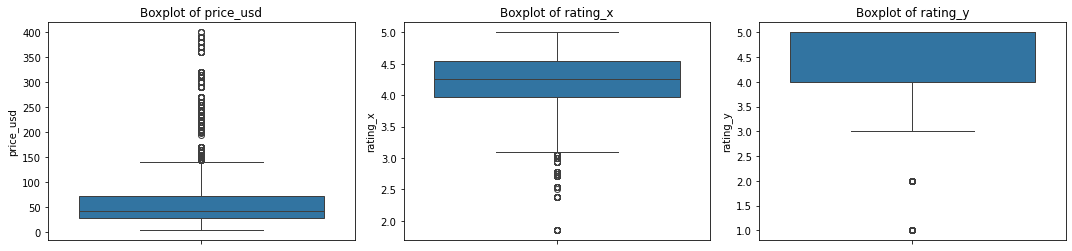

In [10]:
# Identifying Outliers with Boxplots

# Create a list of columns to visualize
columns = ['price_usd', 'rating_x',  'rating_y']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns):
    plt.subplot(3, 3, i + 1)  # Adjust the layout as needed
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

The **price (USD)** boxplot indicates that a number of products are significantly more expensive than the median range, suggesting high-end or luxury skincare items. For **ratings** (both Rating X and Rating Y), the boxplots show several low-rating outliers, indicating products that have received consistent negative feedback.

Premium products and low ratings can be normal in skincare data, especially when catering to diverse skin types and preferences. High-end products often have niche ingredients or technologies, which can drive up prices, and it’s common to see a range of ratings due to individual experiences. 

To make a more informed decision, we need to examine the exact values of the prices to see if they’re extreme enough to warrant special handling or if they are within a reasonable range.

In [11]:
# Define a function to identify outliers based on IQR
def find_outliers(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define outliers as values outside the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return rows with outlier values
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)][[column]]

# Identify outliers for price(ksh) column
price_outliers = find_outliers(data, 'price_usd')
print("Price Outliers:\n", price_outliers)

Price Outliers:
        price_usd
1451       290.0
1452       290.0
1453       290.0
1454       290.0
1455       290.0
...          ...
46162      260.0
46163      260.0
46164      260.0
46165      260.0
46166      260.0

[1194 rows x 1 columns]


These prices are likely for premium or luxury skincare products, which are typically more expensive due to factors like specialized ingredients, brand positioning, or exclusive benefits. Since some users may prefer high-end products, keeping these premium options in the dataset is valid. We'll proceed by segmenting the products into price tiers (e.g., budget, mid-range, premium).

### FEATURE ENGINEERING

Creating a new 'skin_tone_category' column to classify skin tones as 'melanated' or 'non-melanated'. By grouping skin tones we can focus our analysis and modeling efforts on characteristics most relevant to our target audience, ensuring more accurate and personalized recommendations for melanated skin types.

Additionally, we perform other essential feature engineering tasks, including converting the `submission_time` column from an object data type to a datetime format. This conversion enables effective manipulation of time-related data and analysis of trends. We also create a new `price_ksh` column that converts prices from US dollars to Kenyan Shillings using the exchange rate of 1 USD = 129.27 KSH, facilitating financial analysis in the local currency.

In [12]:
# Lists of skin tones categorized as 'light' or 'dark'
light_skin_tones = ['light', 'fair', 'lightMedium', 'fairLight', 'porcelain', 'olive']
dark_skin_tones = ['mediumTan', 'medium', 'tan', 'rich', 'deep', 'dark']
# Creating a new column 'skin_tone_category' with 'light' and 'dark' values
data['skin_tone_category'] = data['skin_tone'].apply(lambda x: 'non-melanated' if x in light_skin_tones else 'melanated' if x in dark_skin_tones else 'other')

# Convert 'submission_time' to datetime format
data['submission_time'] = pd.to_datetime(data['submission_time'], errors='coerce')

# Rename rating_x to rating
data = data.rename(columns={'rating_x': 'rating'})

# Creating a new column 'price_ksh'
data['price_ksh'] = (data['price_usd'] * 129.27)

# Define a function to categorize products by price
def categorize_price(price):
    if price < 5000:
        return 'Budget'
    elif 5000 <= price <= 15000:
        return 'Mid-Range'
    else:
        return 'Premium'

# Apply the function to create a new column 'price_tier'
data['price_tier'] = data['price_ksh'].apply(categorize_price)

# Check the distribution of products in each price tier
print(data['price_tier'].value_counts())

price_tier
Mid-Range    7479
Budget       6939
Premium      1642
Name: count, dtype: int64


In [13]:
# Saving the preprocessed dataset to csv file in our data folder
data.to_csv('data/preprocessed_data.csv')

data.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,helpfulness,review_text,skin_tone,skin_type,eye_color,hair_color,submission_time,skin_tone_category,price_ksh,price_tier
3,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,1.000000,I bought this with the toner as I was looking ...,light,combination,green,brown,2022-09-15,non-melanated,7497.66,Mid-Range
5,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,0.833333,"When this product was recommended to me, I was...",fair,combination,brown,blonde,2021-11-18,non-melanated,7497.66,Mid-Range
8,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,0.777778,this is my first ever purchase from algenist a...,light,oily,brown,black,2021-07-30,non-melanated,7497.66,Mid-Range
9,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,1.000000,When stressed skin starts to burn this seems t...,light,dry,blue,brown,2021-05-17,non-melanated,7497.66,Mid-Range
10,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,1.000000,Sample was sitting in my drawer for months bef...,fair,combination,blue,blonde,2021-05-10,non-melanated,7497.66,Mid-Range


### STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

#### UNIVARIATE ANALYSIS

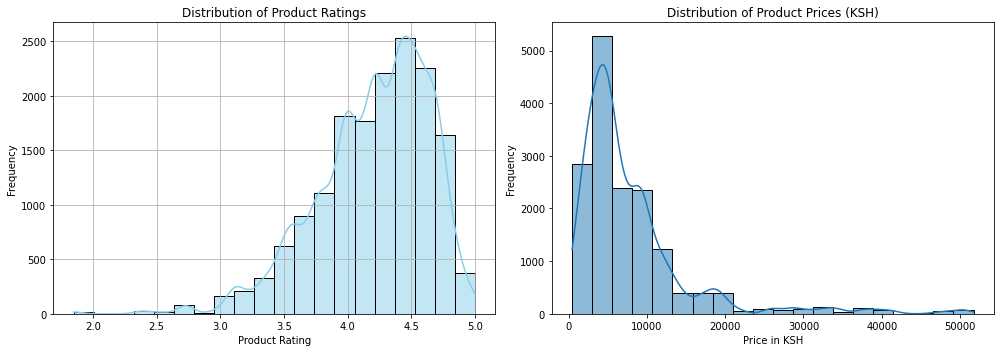

In [14]:
# Distribution of Ratings and Price(ksh)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Visualizing Distribution of Ratings
sns.histplot(data['rating'], bins=20, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Distribution of Product Ratings')
ax1.set_xlabel('Product Rating')
ax1.set_ylabel('Frequency')
ax1.grid()

# Price Distribution
sns.histplot(data['price_ksh'], bins=20, kde=True, ax=ax2)
ax2.set_title('Distribution of Product Prices (KSH)')
ax2.set_xlabel('Price in KSH')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Histogram 1: Most products seem to have higher ratings, indicating a general satisfaction among customers. The peak around the highest rating suggests that products on this platform are generally well-received, though a minority of products still receive lower scores. This distribution helps set expectations for the customer satisfaction range across products.

Histogram 2: The majority of products fall within a low-to-mid price range, suggesting affordability options across the market. This concentration can aid in identifying budget-friendly options for skincare that may appeal to diverse skin tones.

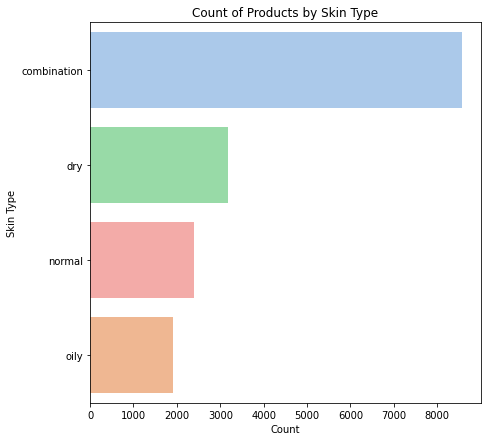

In [15]:
# Count of Products by Skin Type
plt.figure(figsize=(7, 7))
sns.countplot(y='skin_type', data=data, order=data['skin_type'].value_counts().index, palette='pastel', hue='skin_type')
plt.title('Count of Products by Skin Type')
plt.xlabel('Count')
plt.ylabel('Skin Type')
plt.show()

The distribution shows that products labeled for combination skin are the most common, followed by those for dry, normal, and then oily skin. This insight can guide product selection based on prevalent skin types and consumer demand within the Black women demographic.

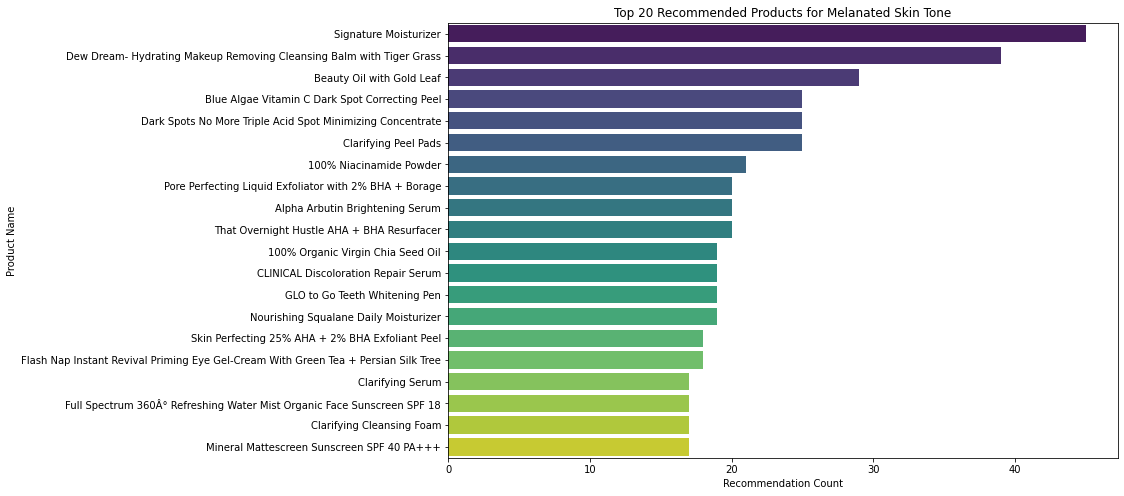

In [16]:
# Top 20 recommended products for melanated skin tone

# Filter data for melanated skin tone and recommended products
melanated_data = data[(data['skin_tone_category'] == 'melanated') & (data['is_recommended'] == 1)]

# Group by product name and count recommendations, selecting the top 20
top_products = melanated_data['product_name'].value_counts().nlargest(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")
plt.title('Top 20 Recommended Products for Melanated Skin Tone')
plt.xlabel('Recommendation Count')
plt.ylabel('Product Name')
plt.show()

The chart highlights skincare products tailored to the specific needs of melanated skin, focusing on hydration, hyperpigmentation, and sun protection. **Signature Moisturizer** leads with the highest recommendation count, emphasizing a strong demand for deep hydration. Products targeting dark spots, such as **Blue Algae Vitamin C Dark Spot Correcting Peel**, show the importance of tone-evening solutions, while sunscreens like **Mineral MatteSunscreen SPF 40 PA+++** address the need for effective sun protection without a white cast. This selection showcases a commitment to skincare that respects and meets the unique requirements of darker skin tones.

#### BIVARIATE ANALYSIS

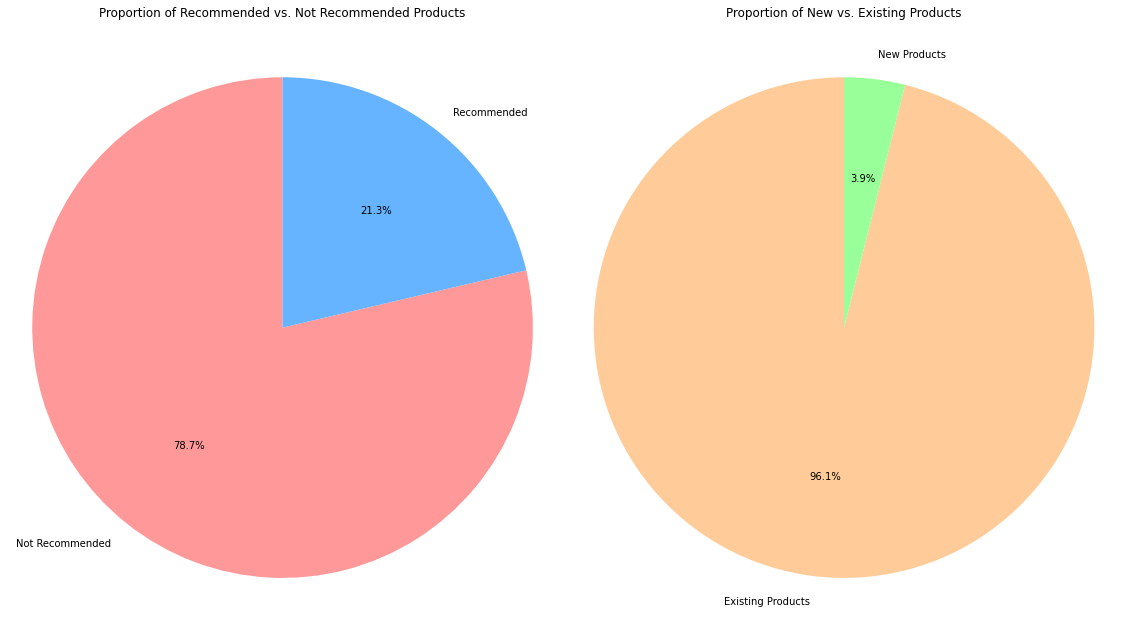

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

# Pie chart for Recommended vs Not Recommended
recommendation_counts = data['is_recommended'].value_counts()
ax1.pie(recommendation_counts, labels=['Not Recommended', 'Recommended'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
ax1.set_title('Proportion of Recommended vs. Not Recommended Products')
ax1.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Pie chart for New vs Existing Products
new_counts = data['new'].value_counts()
ax2.pie(new_counts, labels=['Existing Products', 'New Products'], autopct='%1.1f%%', startangle=90, colors=['#FFCC99', '#99FF99'])
ax2.set_title('Proportion of New vs. Existing Products')
ax2.axis('equal')

plt.tight_layout()
plt.show()

The **Recommended** pie chart illustrates the percentage of products recommended versus those that are not. A significant portion (78.7%) of products are not marked as recommended, indicating a possible quality or suitability gap. This could help identify where product performance might fall short or suggest a need for more tailored product options.

The **Products** pie chart shows the balance between new and existing products. The larger percentage of existing products (96.1%) suggests that the platform maintains a consistent range of products, with newer items being introduced selectively. This distribution can provide insights into the inventory management and refresh rates of the catalog over time.

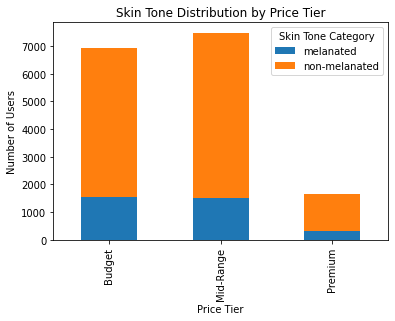

In [18]:
skin_tone_tier = data.groupby(['price_tier', 'skin_tone_category']).size().unstack()
skin_tone_tier.plot(kind='bar', stacked=True)
plt.title('Skin Tone Distribution by Price Tier')
plt.xlabel('Price Tier')
plt.ylabel('Number of Users')
plt.legend(title='Skin Tone Category')
plt.show()

There is a noticeable price difference across skin tones. Products for melanated skin tend to have lower average prices, than non-melanated skin tones, highlighting more affordable options specifically formulated or suited for melanated skin. 

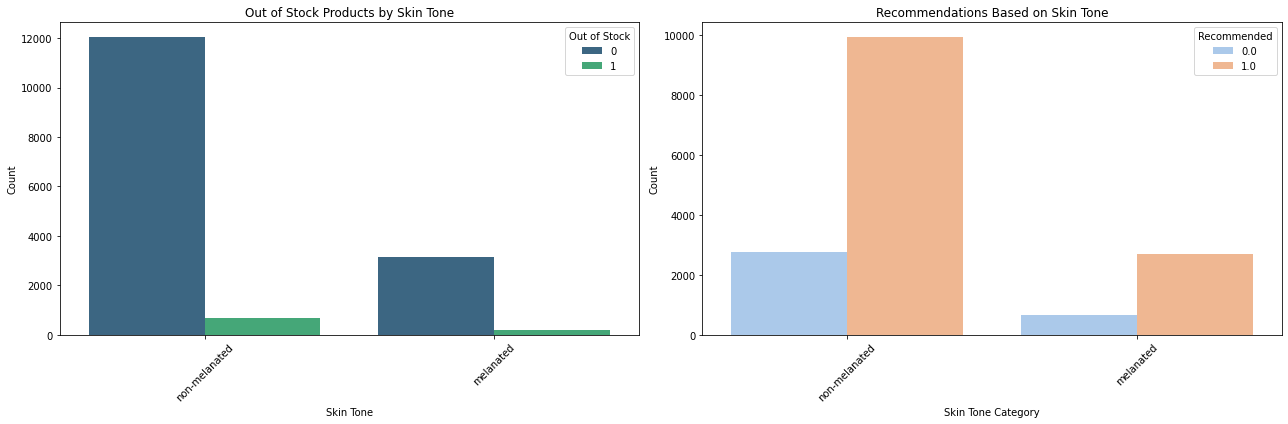

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Out of Stock by Skin Tone
sns.countplot(x='skin_tone_category', hue='out_of_stock', data=data, palette='viridis', ax=ax1)
ax1.set_title('Out of Stock Products by Skin Tone')
ax1.set_xlabel('Skin Tone')
ax1.set_ylabel('Count')
ax1.legend(title='Out of Stock')
ax1.tick_params(axis='x', rotation=45)

# Recommendations by Skin Tone
sns.countplot(x='skin_tone_category', hue='is_recommended', data=data, palette='pastel', ax=ax2)
ax2.set_title('Recommendations Based on Skin Tone')
ax2.set_xlabel('Skin Tone Category')
ax2.set_ylabel('Count')
ax2.legend(title='Recommended')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Lighter skin tones show a higher count of both in-stock and out-of-stock products. This contrasts with deep skin tones which have fewer options overall and lower in-stock counts. This discrepancy might indicate a supply gap for these deeper skin tones, which are more likely to face limited product availability.

Products targeting melanated skin tones receive fewer recommendations, suggesting that product options may not fully address the needs or preferences of these individuals.

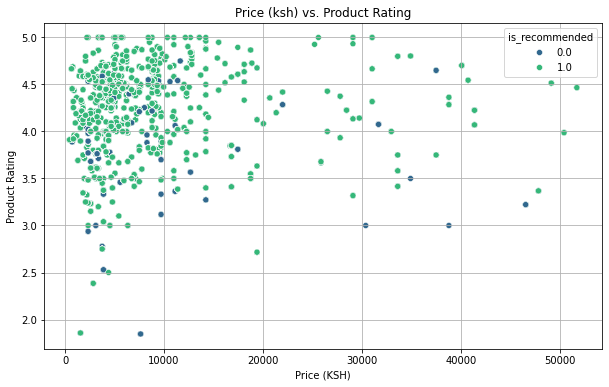

In [20]:
# Correlation between Ratings and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='price_ksh', y='rating', hue='is_recommended', palette='viridis')
plt.title('Price (ksh) vs. Product Rating')
plt.xlabel('Price (KSH)')
plt.ylabel('Product Rating')
plt.grid()
plt.show()

The scatter plot shows the relationship between product price and customer ratings. Although there is no strong correlation, products in the low-to-mid price range tend to receive favorable ratings, suggesting that affordability does not necessarily compromise quality. This insight may encourage users to explore budget-friendly options without sacrificing product satisfaction.

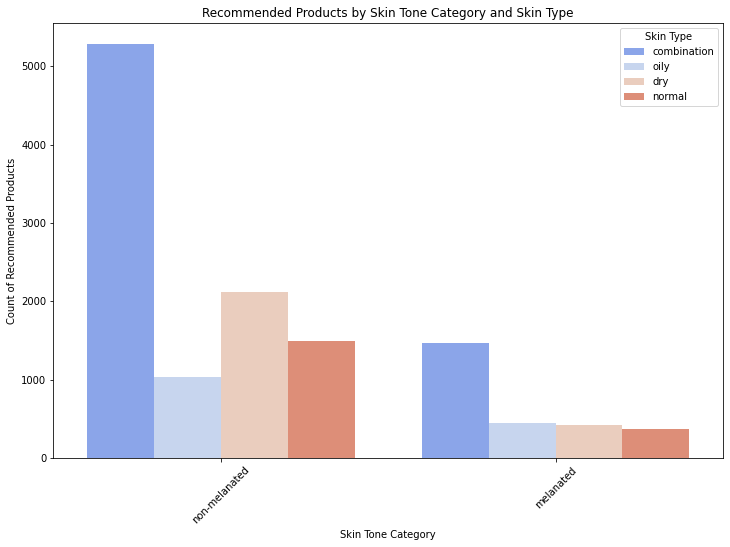

In [21]:
# Count of Recommended Products by Skin Tone and Skin Type
plt.figure(figsize=(12, 8))
sns.countplot(x='skin_tone_category', hue='skin_type', data=data[data['is_recommended'] == 1], palette='coolwarm')
plt.title('Recommended Products by Skin Tone Category and Skin Type')
plt.xlabel('Skin Tone Category')
plt.ylabel('Count of Recommended Products')
plt.xticks(rotation=45)
plt.legend(title='Skin Type')
plt.show()

There are more recommended product options for combination and dry skin types across lighter skin tones. This trend highlights a potential focus on lighter tones in product recommendations, which may overlook the unique needs of Black women with deeper skin tones and varied skin types.

#### MULTIVARIATE ANALYSIS

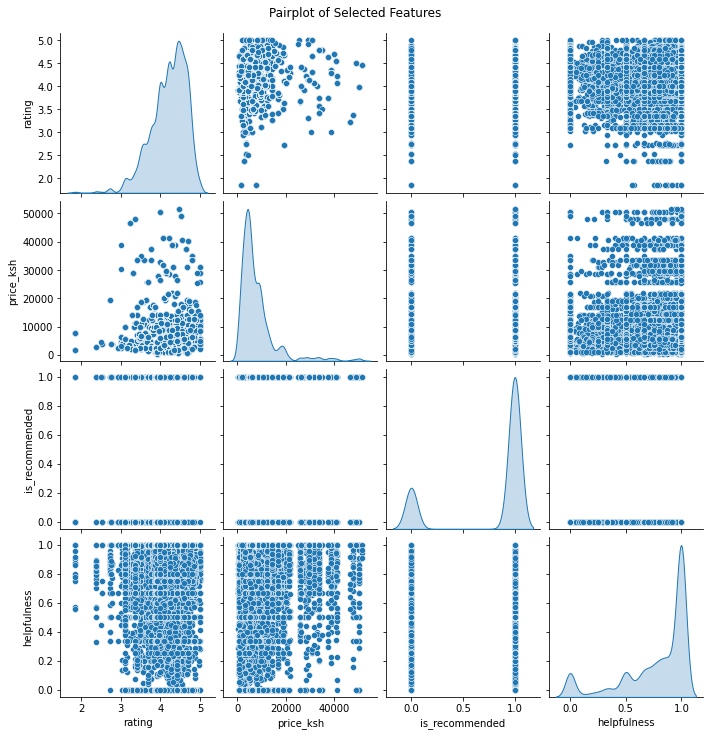

In [22]:
# Pairplot for Selected Features
selected_features = ['rating', 'price_ksh', 'is_recommended', 'helpfulness']
sns.pairplot(data[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

The pair plot examines relationships between selected numeric features, such as rating, price(Ksh), and helpfulness. The absence of clear patterns in most pairwise relationships suggests limited linear correlation among these variables. However, this view offers insight into the variability and potential interactions within the data, aiding in feature selection and engineering for subsequent modeling.

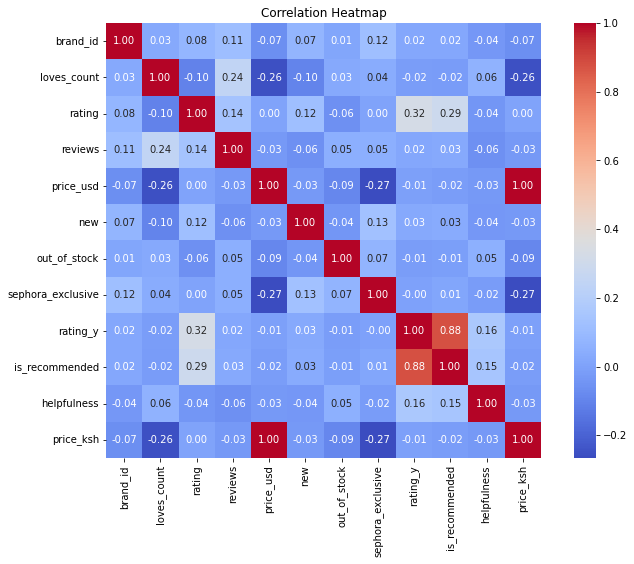

In [23]:
# Heatmap of Correlation Between Numeric Features
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation only on numeric columns
correlation = numeric_data.corr()

# Create the heatmap
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows weak to moderate correlations between numeric features, with notable clusters indicating relationships. 

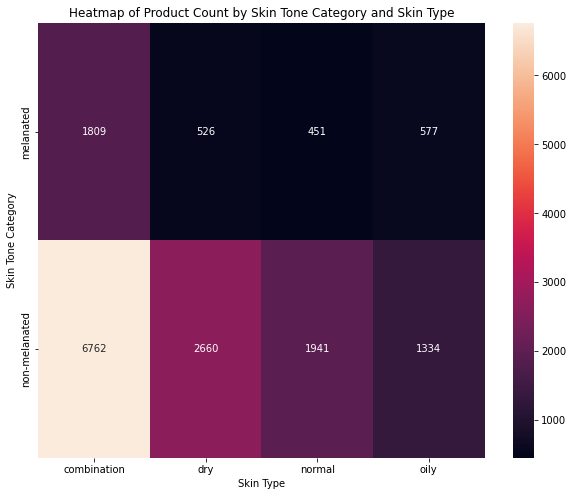

In [24]:
# Create a contingency table
contingency_table = pd.crosstab(index=data['skin_tone_category'], columns=data['skin_type'])
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Heatmap of Product Count by Skin Tone Category and Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Skin Tone Category')
plt.show()

The heatmap analysis of `skin_type` and `skin_tone_category` highlights important insights that align closely with our objective of providing tailored skincare recommendations for Black women. Our data reveals a concentration of products available for combination and dry skin types, particularly within lighter skin tones. However, there is a notable scarcity of options for deeper skin tones, suggesting that Black women may have fewer product options specifically suited to their needs. This gap underscores the limited market focus on skincare for melanin-rich skin concerns, such as hyperpigmentation, dryness, and sensitivity, which are often more pronounced in deeper skin tones.

These findings directly support our business problem: many existing recommendation systems fail to provide targeted solutions for Black women. The evident lack of specialized options for drier skin in deeper tones emphasizes an opportunity to develop and recommend products that address this unique need. By prioritizing these underserved areas, our recommendation system can significantly enhance satisfaction and efficacy for Black women seeking products that work for their melanin-rich skin.

# STEP 4: MODELING

## 1. SENTIMENT ANALYSIS
We'll use NLTK's Sentiment Intensity Analyzer for sentiment scoring on reviews.The goal being to analyze review_text for sentiment to refine recommendations based on positive feedback.

In [25]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Filter data to include only rows where skin_tone_category is 'melanated'
melanated_data = data[data['skin_tone_category'] == 'melanated']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Han\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Han\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Han\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Text Preprocessing for Sentiment Analysis

In [26]:
# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function for text cleaning
def preprocess_text(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Tokenize and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing function to the review text
melanated_data['cleaned_review_text'] = melanated_data['review_text'].apply(preprocess_text)

### Sentiment Analysis and Classification

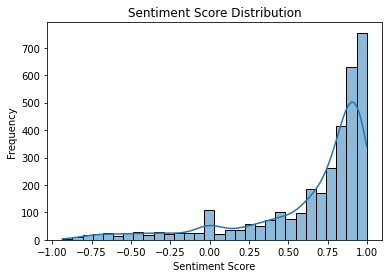

In [27]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()
melanated_data['sentiment_score'] = melanated_data['cleaned_review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

melanated_data['sentiment_category'] = melanated_data['sentiment_score'].apply(classify_sentiment)

# Plot sentiment distribution
sns.histplot(melanated_data['sentiment_score'], kde=True, bins=30)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Most sentiment scores fall between **0.75** and **1.0**, indicating a large proportion of highly favorable reviews. This left-skewed distribution suggests that users with melanated skin tones generally have positive experiences, as evidenced by the high frequency of positive sentiment scores. Overall, this pattern suggests a strong level of satisfaction.

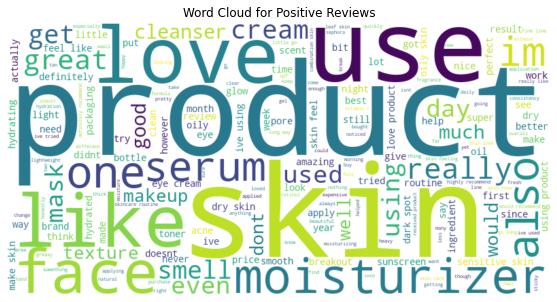

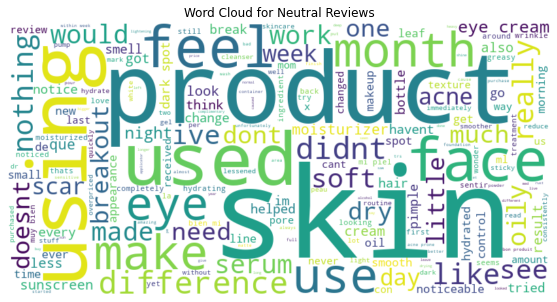

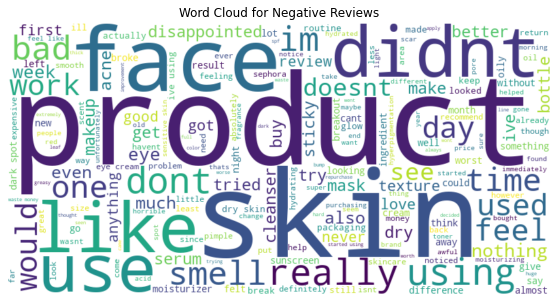

In [28]:
# Generate word clouds for each sentiment category
for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(melanated_data[melanated_data['sentiment_category'] == sentiment]['cleaned_review_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, colormap='viridis').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()

### Sentiment Based Recommendations
Define a function to recommend products based on positive sentiment

In [29]:
def sentiment_based_recommendations(user_id, top_n=5):
    user_reviews = melanated_data[melanated_data['author_id'] == user_id]
    positive_reviews = user_reviews[user_reviews['sentiment_score'] > 0.05]
    return positive_reviews[['product_name', 'skin_type', 'price_ksh']].head(top_n)

# Test with a sample user ID
sample_user_id = '23717108216'
print(sentiment_based_recommendations(sample_user_id , top_n = 5))

                      product_name    skin_type  price_ksh
92  GENIUS Collagen Calming Relief  combination    7497.66


### 2. KNN

Using K-Nearest Neighbors (KNN) with ingredients as features to identify similar products based on their ingredient composition. This will help in recommending products with similar benefits or formulations for users with specific skin tones and types.

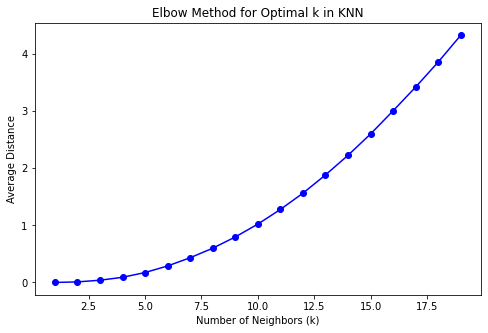

In [30]:
from sklearn.neighbors import NearestNeighbors

# Vectorize the ingredients
vectorizer = TfidfVectorizer(stop_words='english')
ingredient_matrix = vectorizer.fit_transform(melanated_data['ingredients'].fillna(""))

# Define a range of k values to try
k_values = range(1, 20)
errors = []

# Calculate WCSS (within-cluster sum of squares) for each k
for k in k_values:
    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(ingredient_matrix)
    
    # Sum of distances to the nearest k neighbors
    distances, _ = knn.kneighbors(ingredient_matrix)
    wcss = np.sum(distances) / len(distances)  # Calculate average distance
    
    errors.append(wcss)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, errors, 'bo-', markersize=6)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.title('Elbow Method for Optimal k in KNN')
plt.show()

In [31]:
# Initialize and fit the KNN model using the optimal k
k = 5
knn = NearestNeighbors(n_neighbors=k, metric='cosine')
knn.fit(ingredient_matrix)

def get_recommendations(skin_type, top_n=5):
    product_indices = melanated_data[melanated_data['skin_type'] == skin_type].index
    unique_recommendations = []
    seen_products = set()  # To track seen product names

    for index in product_indices:
        distances, indices = knn.kneighbors(ingredient_matrix[index], n_neighbors=k)
        recommended_products = melanated_data.iloc[indices[0]]

        for _, product in recommended_products.iterrows():
            if product['product_name'] not in seen_products:
                unique_recommendations.append(product)
                seen_products.add(product['product_name'])
                
            if len(unique_recommendations) >= top_n:
                break
        if len(unique_recommendations) >= top_n:
            break

    # Convert to DataFrame and sort by rating in descending order
    recommendations_df = pd.DataFrame(unique_recommendations)
    sorted_recommendations = recommendations_df[['product_name', 'brand_name', 'rating', 'price_ksh']].sort_values(by='rating', ascending=False)

    return sorted_recommendations

# Test Recommendation for a Sample Skin Type
skin_type = data['skin_type'].iloc[0]
recommendations = get_recommendations(skin_type)
print(f"Since you liked products for skin type '{skin_type}', you might also like:")
print(recommendations)

Since you liked products for skin type 'combination', you might also like:
                                           product_name     brand_name  \
988                   Vitamin A Serum with 0.5% Retinol        Alpha-H   
1051   Vitamin B Serum with 5% Niacinamide and Peptides        Alpha-H   
1262                             Triple Action Cleanser        Alpha-H   
540                   AA (Alguronic Acid) Barrier Serum       Algenist   
29852              Hyaluronic Dew Drops Hydrating Serum  Mario Badescu   

       rating  price_ksh  
988    4.3579    8402.55  
1051   4.2619    8402.55  
1262   4.2500    4912.26  
540    3.9700   10987.95  
29852  3.5000    3878.10  


### 3. RECOMMENDATION SYSTEM

Our recommendation system can enhance satisfaction and efficacy for Black women by using data-driven insights from the heatmap to spotlight and prioritize products that meet specific, underserved needs. For instance, with the observed lack of options for dry skin in deeper skin tones, our system can recommend products designed to address hydration and moisture retention, which are critical for managing dryness in melanin-rich skin. Additionally, by identifying gaps for specific skin tones and types, we can curate products with ingredients that target common issues like hyperpigmentation or sensitivity—problems particularly relevant to Black women.

Through advanced filtering, collaborative filtering, and sentiment analysis, our system can highlight well-rated products that align with these needs, even if they’re currently under-marketed for Black women. By promoting these options and analyzing user feedback, the system can gradually refine and adjust recommendations, helping users find products that not only align with their skin type and tone but also actively address their unique skin concerns. This targeted approach leads to more effective skincare routines, as users are less likely to waste time or money on unsuitable products, ultimately increasing both satisfaction and loyalty to our recommendation platform.

### A. Recommender that uses the customer features only to recommend the products

In [32]:
def recommend_products_by_user_features(skin_tone_category, skin_type, price_tier, top_n=10):
    # Filter data based on the given user features
    filtered_data = data[(data['skin_tone_category'] == skin_tone_category) & 
                         (data['skin_type'] == skin_type) & 
                         (data['price_tier'] == price_tier)]
    
    # Sort by rating
    recommendations = filtered_data.sort_values('rating', ascending=False)

    # Remove duplicates while selecting the top N products
    unique_recommendations = recommendations.drop_duplicates(subset=['product_name']).head(top_n)
    
    return unique_recommendations[['product_name', 'brand_name', 'rating', 'price_ksh']]

sample_skin_tone_category = 'melanated'
sample_skin_type = 'dry'
sample_price_tier = 'Mid-Range'

print("Top products for your features:")
print(recommend_products_by_user_features(sample_skin_tone_category, sample_skin_type, sample_price_tier))

Top products for your features:
                                            product_name        brand_name  \
1236   Liquid Gold Midnight Reboot Serum with 14% Gly...           Alpha-H   
14227  Instant Reset Brightening Overnight Recovery G...        Fenty Skin   
1353   Pore Perfecting Liquid Exfoliator with 2% BHA ...      alpyn beauty   
23549   KateCeuticals Firming Serum with Hyaluronic Acid   Kate Somerville   
30136       SuperBeauty Daily Antioxidant SkinSupplement        Moon Juice   
42071  Brightening Eye Cream Mineral SPF 15 with Pept...   Soleil Toujours   
28560  Spirulina + Ashwagandha Volcanic Sea Clay Deto...              MARA   
46275  The Silk Serum Wrinkle-Smoothing Retinol Alter...            Tatcha   
23459       HydraKate Recharging Water Cream Moisturizer   Kate Somerville   
36884                      Blemish Control Booster Serum  ROSE Ingleton MD   

       rating  price_ksh  
1236   5.0000   13573.35  
14227  5.0000    5170.80  
1353   4.9231    5041.53  
2

### B. Content-Based Filtering Model
- We’ll start with a content-based filtering model using TF-IDF on ingredients and other product features.The aim is to recommend similar products based on ingredients and product features.


**Text Cleaning**:
Leaving ingredients raw preserves essential chemical terms for analysis. This enables targeted NLP method, TF-IDF, to identify key ingredients and supports ingredient-based recommendations. This approach maintains data integrity for future modeling without altering original content.

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Vectorize ingredients and create a cosine similarity matrix
tfidf = TfidfVectorizer(stop_words='english')
ingredients_matrix = tfidf.fit_transform(data['ingredients'].fillna(''))

# Calculate cosine similarity
cosine_sim = cosine_similarity(ingredients_matrix, ingredients_matrix)

# Function to extract top N terms for each ingredient based on TF-IDF score
def get_top_ingredients(tfidf_vector, feature_names, top_n=5):
    sorted_indices = tfidf_vector.argsort()[::-1][:top_n]
    top_terms = [feature_names[i] for i in sorted_indices]
    return ', '.join(top_terms)

# Function to recommend products based on content similarity
def content_based_recommendations(product_name, top_n=5):
    try:
        product_index = data[data['product_name'] == product_name].index[0]
    except IndexError:
        print("Product not found in the dataset.")
        return None

    # Calculate similarity scores
    sim_scores = list(enumerate(cosine_sim[product_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Initialize a list to keep track of unique product recommendations
    unique_recommendations = []
    seen_products = set()  # Set to track seen product names

    for score in sim_scores:
        product_idx = score[0]
        product_name_candidate = data.iloc[product_idx]['product_name']

        # Add to recommendations if not already seen and not the input product
        if product_name_candidate != product_name and product_name_candidate not in seen_products:
            unique_recommendations.append(product_idx)
            seen_products.add(product_name_candidate)
        
        # Stop if we've collected enough recommendations
        if len(unique_recommendations) >= top_n:
            break

    # Get recommended products
    recommendations = data.iloc[unique_recommendations][['product_name', 'brand_name', 'rating', 'price_tier', 'price_usd', 'price_ksh']]

    # Add a column for top ingredients by iterating over the ingredient vectors
    feature_names = tfidf.get_feature_names_out()
    top_ingredients = []
    for index in unique_recommendations:
        row_vector = ingredients_matrix[index].toarray().flatten()
        top_ingredients.append(get_top_ingredients(row_vector, feature_names))
    recommendations['top_ingredients'] = top_ingredients

    # Sort recommendations by rating in descending order
    sorted_recommendations = recommendations.sort_values(by='rating', ascending=False)

    return sorted_recommendations

# Test the function with a sample product name
sample_product_name = data['product_name'].iloc[0]
print(f"Since you liked '{sample_product_name}', you might also like:")
print(content_based_recommendations(sample_product_name))

Since you liked 'GENIUS Collagen Calming Relief', you might also like:
                                            product_name         brand_name  \
48022              Nourishing Squalane Daily Moisturizer         The Outset   
44728                              Baba Bomb Moisturizer              tarte   
33699  Dr. Andrew Weil for Origins Mega-Mushroom Weig...            Origins   
245                 GENIUS Ultimate Anti-Aging Eye Cream           Algenist   
8291                         Super Anti-Aging Face Cream  Dr. Barbara Sturm   

       rating price_tier  price_usd  price_ksh  \
48022  4.5893  Mid-Range       44.0    5687.88   
44728  4.4104  Mid-Range       39.0    5041.53   
33699  4.1000  Mid-Range       40.0    5170.80   
245    3.7759  Mid-Range       74.0    9565.98   
8291   3.2222    Premium      360.0   46537.20   

                                        top_ingredients  
48022          oil, seed, annuus, helianthus, sunflower  
44728       oil, saponins, sinensis, 

### C. Collaborative Filtering with SVD
- Now we’ll implement collaborative filtering using SVD to capture latent user-product interactions.The goal is to use Matrix Factorization (SVD) on the user-product interaction data for collaborative recommendations.

In [34]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Create User-Product Interaction Matrix
user_product_matrix = data.pivot_table(index='author_id', columns='product_id', values='rating').fillna(0)

# Apply SVD
svd = TruncatedSVD(n_components=20)
latent_matrix = svd.fit_transform(user_product_matrix)

# Recommending Top Products for a User
def collaborative_recommendations(user_id, top_n=5):
    # Find the index of the user in the DataFrame
    user_index = data.index[data['author_id'] == user_id].tolist()[0]
    # Calculate scores based on the latent matrix
    scores = latent_matrix[user_index].dot(latent_matrix.T)
    # Get the indices of the top recommendations
    top_recommendations = scores.argsort()[-top_n:][::-1]
    
    # Fetch recommended products
    recommended_products = data.iloc[top_recommendations][['product_name', 'brand_name', 'rating', 'price_ksh']]

    # Sort recommendations by rating in descending order
    sorted_recommendations = recommended_products.sort_values(by='rating', ascending=False)
    
    return sorted_recommendations

# Test Recommendation for a Sample User
sample_user_id = data['author_id'].iloc[0]
print("Collaborative Filtering Recommendations:")
print(collaborative_recommendations(sample_user_id))

Collaborative Filtering Recommendations:
                                            product_name         brand_name  \
37124  The C Drops â 20% Vitamin C Blend Brightenin...  Saint Jane Beauty   
41378                             Ultimate Revival Cream              SK-II   
44983                knockout daily exfoliating cleanser              tarte   
270                 GENIUS Ultimate Anti-Aging Eye Cream           Algenist   
4997   Even Better Clinical Radical Dark Spot Correct...           CLINIQUE   

       rating  price_ksh  
37124  4.7500   11634.30  
41378  4.4667   51708.00  
44983  3.8983    1551.24  
270    3.7759    9565.98  
4997   3.5824   10987.95  


#### Recommendation Evaluation

In [35]:
# code

### 4. DEEP LEARNING MODEL FOR SENTIMENT PREDICTION


FEATURE SELECTION

In [36]:
# Label encode categorical features
categorical_features = ['brand_name', 'variation_type', 'primary_category', 'secondary_category', 'tertiary_category', 
                        'skin_tone', 'skin_type', 'eye_color', 'hair_color']
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Scale numeric features
scaler = StandardScaler()
numeric_features = ['loves_count', 'rating', 'reviews', 'price_usd', 'helpfulness']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

Building a Long-short Term Model (LSTM) for sentiment prediction:

In [37]:
# Sample data
texts = melanated_data['cleaned_review_text'].values  # Your cleaned reviews
labels = melanated_data['sentiment_category'].values  # Your labels (e.g., positive, negative, neutral)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Limit to the top 10,000 words
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)  # Pad sequences to a maximum length of 100

# Encoding labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Embedding layer
model.add(LSTM(128))  # LSTM layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(3, activation='softmax'))  # Output layer for three classes

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
68/68 [==============================] - 10s 113ms/step - loss: 0.5509 - accuracy: 0.8671 - val_loss: 0.3789 - val_accuracy: 0.8996
Epoch 2/10
68/68 [==============================] - 7s 107ms/step - loss: 0.4120 - accuracy: 0.8792 - val_loss: 0.3386 - val_accuracy: 0.8996
Epoch 3/10
68/68 [==============================] - 7s 108ms/step - loss: 0.2581 - accuracy: 0.9001 - val_loss: 0.3472 - val_accuracy: 0.9015
Epoch 4/10
68/68 [==============================] - 7s 110ms/step - loss: 0.1597 - accuracy: 0.9461 - val_loss: 0.4160 - val_accuracy: 0.8625
Epoch 5/10
68/68 [==============================] - 8s 111ms/step - loss: 0.0932 - accuracy: 0.9717 - val_loss: 0.4713 - val_accuracy: 0.8959
Epoch 6/10
68/68 [==============================] - 7s 104ms/step - loss: 0.0530 - accuracy: 0.9851 - val_loss: 0.6054 - val_accuracy: 0.8773
Epoch 7/10
68/68 [==============================] - 7s 104ms/step - loss: 0.0198 - accuracy: 0.9958 - val_loss: 0.6466 - val_accuracy: 0.8699
Epoch

22/22 [==============================] - 1s 28ms/step - loss: 0.8652 - accuracy: 0.8678
Test Accuracy: 0.8677563071250916


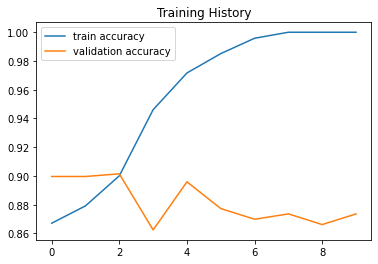

In [38]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Training History')
plt.show()

#### Model Performance
- **Test Accuracy**: 86.77%
- **Loss**: 0.8652
The model achieved a good accuracy but shows a slightly higher loss, indicating room for improvement in generalization.

### 5. MACHINE LEARNING MODEL TO COMPLEMENT OVERALL RECOMMENDATION SYSTEM

##### Drop Unnecessary Columns
Now that we’ve vectorized ingredients and review_text, and extracted sentiment scores, we can drop these original columns

In [39]:
# Drop the original text columns
data = data.drop(columns=['ingredients'])

##### Preprocess the Data Completely
- Ensure all columns in X are numeric before applying any model. We’ve already converted most columns using TF-IDF, label encoding, and sentiment analysis.

In [40]:
# Check for remaining non-numeric columns
non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# If there are any remaining non-numeric columns, consider encoding or removing them.

Non-numeric columns: Index(['product_id', 'product_name', 'size', 'variation_value', 'highlights',
       'author_id', 'review_text', 'skin_tone_category', 'price_tier'],
      dtype='object')


In [41]:
# Drop unneeded columns
data = data.drop(columns=['product_id', 'author_id'])

# Apply TF-IDF on `product_name` and `highlights'
tfidf_product_name = TfidfVectorizer(max_features=50)
product_name_matrix = tfidf_product_name.fit_transform(data['product_name']).toarray()
product_name_df = pd.DataFrame(product_name_matrix, index=data.index)

tfidf_highlights = TfidfVectorizer(max_features=50)
highlights_matrix = tfidf_highlights.fit_transform(data['highlights']).toarray()
highlights_df = pd.DataFrame(highlights_matrix, index=data.index)

# Concatenate TF-IDF results and drop the original columns
data = pd.concat([data, product_name_df, highlights_df], axis=1)
data = data.drop(columns=['product_name', 'highlights'])

# Encode `size` and `variation_value` if needed
le_size = LabelEncoder()
data['size'] = le_size.fit_transform(data['size'])

le_variation_value = LabelEncoder()
data['variation_value'] = le_variation_value.fit_transform(data['variation_value'])

In [42]:
# Performing Train-Test Split

# Define features (X) and target (y) - 'is_recommended' is the target variable
X = melanated_data.drop(columns=['is_recommended', 'review_text', 'cleaned_review_text'])
y = melanated_data['is_recommended']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### A. Random Forest

In [43]:
# Convert all column names to strings for both train and test sets
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Dropping datetime columns from training data
X_train = X_train.select_dtypes(exclude=['datetime64'])
X_test = X_test.select_dtypes(exclude=['datetime64'])

# Specify which columns are categorical
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['product_id', 'product_name', 'brand_name', 'size', 'variation_type',
       'variation_value', 'ingredients', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'author_id', 'skin_tone',
       'skin_type', 'eye_color', 'hair_color', 'skin_tone_category',
       'price_tier', 'sentiment_category'],
      dtype='object')

In [44]:
from sklearn.pipeline import Pipeline
# Manually one-hot encode categorical columns in training and test sets
X_train_encoded = pd.get_dummies(X_train, columns = categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns= categorical_cols, drop_first=True)

# Align columns in X_test_encoded with X_train_encoded in case of any missing columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Create a pipeline with only the classifier (no need for preprocessor)
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the encoded training data
pipeline.fit(X_train_encoded, y_train)

# Predict on the encoded test data
y_pred = pipeline.predict(X_test_encoded)

### B. XGBoost Model

In [45]:
# XGBoost Model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_encoded.values,y_train.values)
y_pred_xgb = xgb_model.predict(X_test_encoded.values)

Model Evaluation

Random Forest Accuracy: 0.92
Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       141
         1.0       0.93      0.97      0.95       532

    accuracy                           0.92       673
   macro avg       0.91      0.85      0.88       673
weighted avg       0.92      0.92      0.92       673



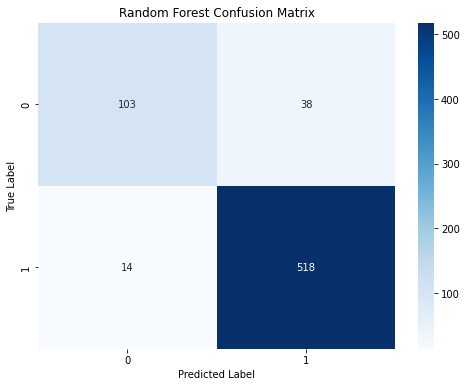

In [46]:
# Evaluation function to check accuracy and classification report
def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n", classification_report(y_true, y_pred))
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
# Evaluate Random Forest
evaluate_model("Random Forest", y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)

XGBoost Accuracy: 0.94
Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       141
         1.0       0.96      0.97      0.96       532

    accuracy                           0.94       673
   macro avg       0.92      0.91      0.91       673
weighted avg       0.94      0.94      0.94       673



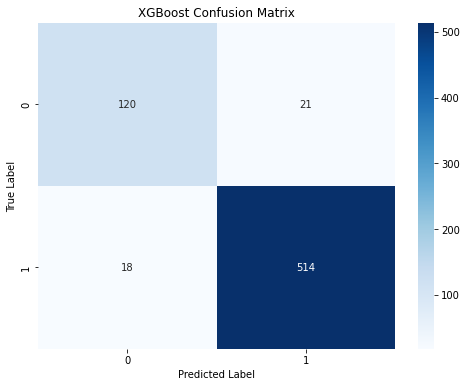

In [47]:
# Evaluate XGBoost
evaluate_model("XGBoost", y_test, y_pred_xgb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

Visualisation of Model Performance

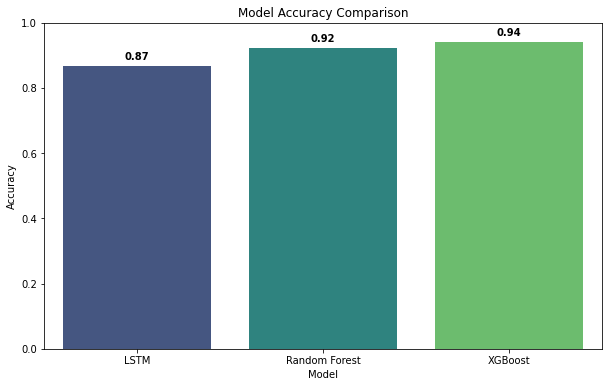

In [48]:
# Model names and their accuracies
models = ['LSTM','Random Forest', 'XGBoost']
accuracies = [accuracy,accuracy_rf, xgb_accuracy]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

- The Random Forest model performs well,with 92% accuracy and especially in predicting class 1 (positive class), with high precision and recall values. However, the lower recall for class 0 (negative class) suggests that some negative cases are being misclassified.
  
- The XGBoost model exhibits superior performance compared to the Random Forest, achieving higher accuracy of 94% and balanced metrics across both classes, indicating a robust prediction capability.

- According to our metric of successs our metrics indicates that the recommendation system is performing well, with a strong balance between the accuracy of recommendations and user satisfaction.

### SAVING THE MODELS

In [49]:
# Paths to save the models
sentiment_model_path = 'models/sentiment_analysis_model.pkl'
knn_model_path = 'models/knn_model.pkl'
svd_model_path = 'models/svd_model.pkl'
xgb_model_path = 'models/xgboost_model.pkl'

# Save sentiment analysis model (Sentiment Intensity Analyzer - SIA)
with open(sentiment_model_path, 'wb') as file:
    pickle.dump(sia, file)

# Save KNN model for ingredient-based recommendation
with open(knn_model_path, 'wb') as file:
    pickle.dump(knn, file)
    
# Save SVD model for collaborative filtering
with open(svd_model_path, 'wb') as file:
    pickle.dump(svd, file)

# Save XGBoost model
with open(xgb_model_path, 'wb') as file:
    pickle.dump(xgb_model, file)